### Step 1: Mount the Google Drive or clone repo


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Step 2: Open the project directory



In [2]:
cd /content/drive/MyDrive/codwoe


/content/drive/MyDrive/codwoe


### Step 3: Install required packages

After installing them, Colab will require you to restart the session.

In [3]:
#Install Rustup
!apt-get update
!apt-get install -y build-essential cmake libhdf5-dev swig wget
!curl https://sh.rustup.rs -sSf | sh -s -- -y
!export PATH="$HOME/.cargo/bin:$PATH"

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [4]:
!pip install --upgrade pip setuptools wheel


In [5]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.6/666.6 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 142.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 175.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 157.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 147.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install scikit-optimize==0.9.0


### Step 4: Train and Evaluate Models



#### Training

In [29]:
!python3 baseline_archs/code/revdict.py --do_train \
    --train_file data/en.train.json \
    --dev_file data/en.dev.json \
    --device cuda \
    --target_arch sgns \
    --summary_logdir baseline_archs/logs/revdict-baseline2 \
    --save_dir baseline_archs/models/revdict-baseline2 \
    --spm_model_path baseline_archs/models/revdict-baseline2


Failed checking if argv[0] is an import path entry
Traceback (most recent call last):
  File "<frozen importlib._bootstrap_external>", line 1701, in path_hook_for_FileFinder
  File "<frozen importlib._bootstrap_external>", line 168, in _path_isdir
  File "<frozen importlib._bootstrap_external>", line 153, in _path_is_mode_type
  File "<frozen importlib._bootstrap_external>", line 147, in _path_stat
KeyboardInterrupt
2025-03-07 05:27:00.183821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741325220.204459  103612 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741325220.210926  103612 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 05:27:

In [28]:
!python3 code/revdict.py --do_train \
    --train_file data/en.train.json \
    --dev_file data/en.dev.json \
    --device cuda \
    --target_arch sgns \
    --summary_logdir logs/revdict-KNNaug \
    --save_dir models/revdict-KNNaug \
    --spm_model_path models/revdict-KNNaug

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 19, in <module>
    from .utils._estimator_html_repr import _HTMLDocumentationLinkMixin, estimator_html_repr
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/__init__.py", line 15, in <module>
    from ._chunking import gen_batches, gen_even_slices
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_chunking.py", line 11, in <module>
    from ._param_validation import Interval, validate_params
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 17, in <module>

#### Testing:


In [7]:
!python3 baseline_archs/code/revdict.py --do_pred \
    --test_file data/en.test.revdict.json \
    --device cuda \
    --target_arch sgns \
    --save_dir baseline_archs/models/revdict-baseline2/sgns \
    --pred_file baseline_archs/models/revdict-baseline2/sgns/revdict_predictions_sgns.json


2025-03-06 00:24:50.349881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741220690.370399   24168 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741220690.376792   24168 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 00:24:50.397625: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-06 00:24:53,197 [DEBUG] revdict.py: Performing revdict prediction
/content/drive/MyDrive/codwoe/baseline_arch

In [4]:
!python3 code/revdict.py --do_pred \
    --test_file data/en.test.revdict.json \
    --device cuda \
    --target_arch sgns \
    --save_dir models/revdict-KNNaug/sgns \
    --pred_file models/revdict-KNNaug/sgns/revdict_predictions_KNNaug.json

2025-03-07 03:50:43.306150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741319443.327290   78809 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741319443.333701   78809 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 03:50:43.355565: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-07 03:50:46,074 [DEBUG] revdict.py: Performing revdict prediction
/content/drive/MyDrive/codwoe/code/models.p

In [8]:
!python3 code/score.py \
    baseline_archs/models/revdict-baseline2/sgns/revdict_predictions_sgns.json \
    --reference_files_dir data \
    --output_file baseline_archs/models/revdict-baseline2/sgns/scores.txt


2025-03-06 00:25:16.426940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741220716.447483   24302 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741220716.453620   24302 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 00:25:16.474315: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
GroupViT models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probabil

In [3]:
!python3 code/score.py \
    models/revdict-KNNaug/sgns/revdict_predictions_KNNaug.json \
    --reference_files_dir data \
    --output_file models/revdict-KNNaug/sgns/scores.txt


2025-03-07 03:52:55.328767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741319575.349854   79661 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741319575.356157   79661 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 03:52:55.377021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
GroupViT models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probabil

#### Analysis

In [15]:
#Include relevant log folders for each model
run_logs = {
    'Baseline': 'baseline_archs/logs/revdict-baseline',
    'KNNaug': 'logs/revdict-KNNaug'
}


In [12]:
import pandas as pd
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def tflog2pandas(path: str) -> pd.DataFrame:
    """Convert TensorBoard data into Pandas DataFrame.

    Args:
      path: Path to the TensorBoard event file.

    Returns:
      A pandas DataFrame containing the TensorBoard data.
    """
    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": []})
    event_acc = EventAccumulator(path)
    event_acc.Reload()
    tags = event_acc.Tags()["scalars"]
    for tag in tags:
        event_list = event_acc.Scalars(tag)
        values = list(map(lambda x: x.value, event_list))
        step = list(map(lambda x: x.step, event_list))
        r = {"metric": [tag] * len(values), "value": values, "step": step}
        df = pd.DataFrame(r)
        runlog_data = pd.concat([runlog_data, df])
    return runlog_data


all_logs = []
for run_name, path in run_logs.items():
# Search for event files in all subdirectories within the run directory
  for root, _, files in os.walk(path):
      for file in files:
          if file.startswith("events.out.tfevents"):
              event_file_path = os.path.join(root, file)

              # Process the event file
              df = tflog2pandas(event_file_path)
              df['run_name'] = run_name
              all_logs.append(df)

# Concatenate all dataframes
final_df = pd.concat(all_logs, ignore_index=True)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metric_over_steps(df, metric_name, xlog=False, ylog=False):
    """Plots a specific metric over steps for different runs.

    Args:
        df: Pandas DataFrame containing the data.
        metric_name: The name of the metric to plot.
    """
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.lineplot(data=df[df['metric'] == metric_name], x="step", y="value", hue="run_name")
    plt.title(f"{metric_name} over Steps")
    plt.xlabel("Step")
    plt.ylabel(metric_name)
    plt.legend(title="Run Name")
    if xlog:
      plt.xscale('log')
    if ylog:
      plt.yscale('log')
    plt.show()

In [7]:
final_df['metric'].unique().tolist()

['revdict-train/lr',
 'revdict-train/cos',
 'revdict-train/mse',
 'revdict-dev/cos',
 'revdict-dev/mse']

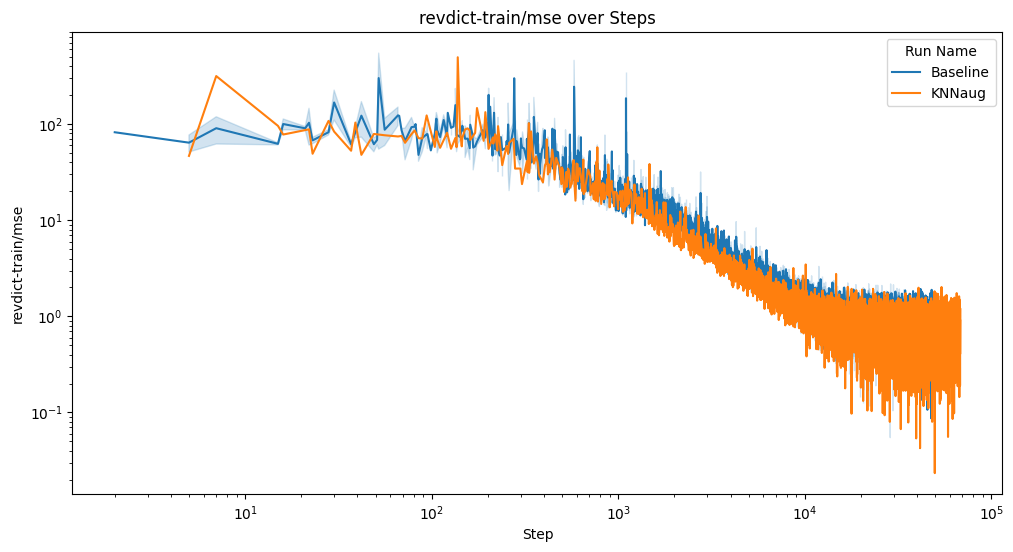

In [21]:
plot_metric_over_steps(final_df, 'revdict-train/mse', xlog=True, ylog=True)

All runs: ['Baseline' 'KNNaug']
Runs at max step: ['KNNaug']
Runs in max_step_data: ['Baseline' 'KNNaug']


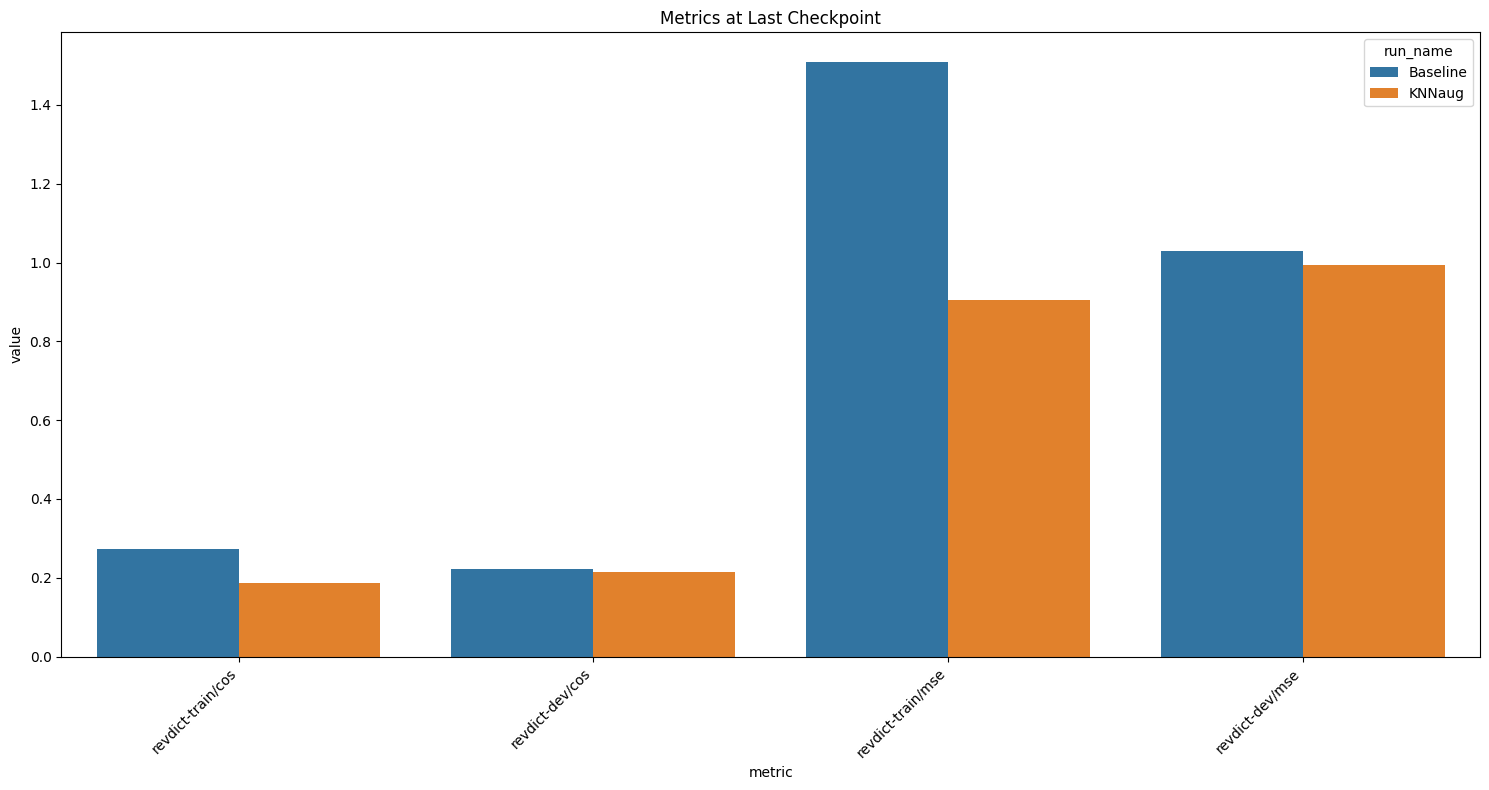

In [26]:

import numpy as np

last_step_metrics = []
for metric in ['cos', 'mse']:
  for group in ['revdict-train', 'revdict-dev']:
    col_name = f'{group}/{metric}'
    last_step_metrics.append(col_name)

#if runs go to same max step (constant num epochs across runs)
max_step = np.max(final_df['step'])
#max_step_data = final_df[final_df['step'] == max_step]

#elif runs have different end step
#max_step_data = final_df.sort_values('step').groupby('run_name').tail(1)
max_step_data = (
    final_df
    .sort_values('step')
    .groupby(['run_name', 'metric'])
    .tail(1)
)
max_step_data = max_step_data[max_step_data['metric'].isin(last_step_metrics)]

#print("All runs:", final_df['run_name'].unique())
#print("Runs at max step:", final_df[final_df['step'] == max_step]['run_name'].unique())
#print("Runs in max_step_data:", max_step_data['run_name'].unique())

# Reshape the data for plotting, handling missing values
plot_df = max_step_data.pivot(index='run_name', columns='metric', values='value')

# Get the actual columns present in plot_df
available_metrics = plot_df.columns.tolist()

# Filter last_step_metrics to include only available metrics
value_vars = [metric for metric in last_step_metrics if metric in available_metrics]

# Melt the DataFrame to long format, using only available metrics
plot_df = pd.melt(plot_df.reset_index(), id_vars=['run_name'], value_vars=value_vars)
plot_df.columns = ['run_name', 'metric', 'value']

# Create the bar plot using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(data=plot_df, x='metric', y='value', hue='run_name')
plt.xticks(rotation=45, ha='right')
plt.title('Metrics at Last Checkpoint')
plt.tight_layout()
plt.show()

In [27]:
plot_df.pivot(index='run_name', columns='metric', values='value')[last_step_metrics]


metric,revdict-train/cos,revdict-dev/cos,revdict-train/mse,revdict-dev/mse
run_name,,,,
Baseline,0.273558,0.221406,1.509007,1.028326
KNNaug,0.187356,0.215035,0.904335,0.994935
